In [20]:
import numpy as np
import pandas as pd
import plotly
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)
pd.set_option('display.max_rows',None)

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Road%20traffic%20deaths%2C%201990%20to%202019/output.csv")
df.head()

,Unnamed: 0,Entity,Code,Year,Deaths,Sidedness
0,0,Afghanistan,AFG,1990,4154,0
1,1,Afghanistan,AFG,1991,4472,0
2,2,Afghanistan,AFG,1992,5106,0
3,3,Afghanistan,AFG,1993,5681,0
4,4,Afghanistan,AFG,1994,6001,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8010 non-null   int64 
 1   Entity      8010 non-null   object
 2   Code        6150 non-null   object
 3   Year        8010 non-null   int64 
 4   Deaths      8010 non-null   int64 
 5   Sidedness   8010 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 375.6+ KB


In [24]:
df.isnull().sum()

Unnamed: 0       0
Entity           0
Code          1860
Year             0
Deaths           0
Sidedness        0
dtype: int64

In [25]:
len(df["Entity"].unique())

267

In [26]:
df["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [27]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Deaths', 'Sidedness'], dtype='object')

In [29]:
country = list(df['Entity'].unique())
new_df = pd.DataFrame({'Entity': [], 'Code': [], 'Year': [],'Deaths': []})
for con in country:
    ndf = df[df['Entity'] == con]
    ndf = ndf[ndf['Deaths'] == ndf['Deaths'].max()]
    
    new_df = new_df.append(ndf,ignore_index=True)
new_df.sort_values(by = 'Deaths',ascending =False).head(10)

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
540,World,OWID_WRL,2008.0,1285039.0,7788.0,0.0
137,G20,NaN,2008.0,836394.0,2748.0,0.0
39,Asia,NaN,2010.0,800886.0,440.0,0.0
544,World Bank Upper Middle Income,NaN,2005.0,596946.0,7905.0,0.0
255,Middle SDI,NaN,2009.0,493523.0,4579.0,0.0
115,East Asia & Pacific - World Bank region,NaN,2004.0,480385.0,2144.0,0.0
543,World Bank Lower Middle Income,NaN,2012.0,470563.0,7882.0,0.0
445,"Southeast Asia, East Asia, and Oceania",NaN,2005.0,462434.0,6585.0,0.0
538,Western Pacific Region,NaN,2009.0,399720.0,7729.0,0.0
81,Commonwealth,NaN,2019.0,343554.0,1589.0,0.0


In [30]:
new_df[new_df.duplicated(subset = 'Entity')].tail(10)

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
515,Tuvalu,TUV,2011.0,3.0,7311.0,1.0
516,Tuvalu,TUV,2012.0,3.0,7312.0,1.0
517,Tuvalu,TUV,2013.0,3.0,7313.0,1.0
518,Tuvalu,TUV,2014.0,3.0,7314.0,1.0
519,Tuvalu,TUV,2015.0,3.0,7315.0,1.0
520,Tuvalu,TUV,2016.0,3.0,7316.0,1.0
521,Tuvalu,TUV,2017.0,3.0,7317.0,1.0
522,Tuvalu,TUV,2018.0,3.0,7318.0,1.0
523,Tuvalu,TUV,2019.0,3.0,7319.0,1.0
530,United States Virgin Islands,VIR,1996.0,21.0,7476.0,0.0


In [31]:
new_df.loc[122, 'Code'] = 'ENG'
region = new_df[new_df['Code'].isnull()]
region.head()

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
1,Africa,NaN,2019.0,236531.0,59.0,0.0
2,African Region,NaN,2019.0,182243.0,89.0,0.0
3,African Union,NaN,2019.0,236531.0,119.0,0.0
6,America,NaN,2009.0,161802.0,199.0,0.0
21,Andean Latin America,NaN,2011.0,11906.0,261.0,0.0


In [33]:
country = new_df.dropna()
country.sort_values(by = 'Deaths',ascending =False).head(5)

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
540,World,OWID_WRL,2008.0,1285039.0,7788.0,0.0
79,China,CHN,2009.0,329237.0,1519.0,1.0
178,India,IND,2012.0,218869.0,3442.0,1.0
179,Indonesia,IDN,2001.0,50597.0,3461.0,1.0
61,Brazil,BRA,2011.0,49449.0,981.0,0.0


In [34]:
country[country['Entity'] == 'World']

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
540,World,OWID_WRL,2008.0,1285039.0,7788.0,0.0


In [35]:
top15 = country.sort_values(by = 'Deaths',ascending = False)[:15]
fig = px.bar(top15[::-1], x= 'Deaths', 
            y = 'Entity', orientation = 'h', color_discrete_sequence  = px.colors.sequential.RdBu, 
            title = 'Top 10 countries with Highest occurances of Road Accidents',
            hover_name = 'Year')
fig.show()
region[region['Entity'] == 'World']

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness


In [36]:
region.head()

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
1,Africa,NaN,2019.0,236531.0,59.0,0.0
2,African Region,NaN,2019.0,182243.0,89.0,0.0
3,African Union,NaN,2019.0,236531.0,119.0,0.0
6,America,NaN,2009.0,161802.0,199.0,0.0
21,Andean Latin America,NaN,2011.0,11906.0,261.0,0.0


In [37]:
region = region.append(country[country['Entity'] == 'World'],ignore_index=True)
region.tail(5)

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
57,World Bank High Income,NaN,1990.0,193137.0,7800.0,0.0
58,World Bank Low Income,NaN,2019.0,120076.0,7859.0,0.0
59,World Bank Lower Middle Income,NaN,2012.0,470563.0,7882.0,0.0
60,World Bank Upper Middle Income,NaN,2005.0,596946.0,7905.0,0.0
61,World,OWID_WRL,2008.0,1285039.0,7788.0,0.0


In [38]:
country[country['Entity'] == 'World']

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
540,World,OWID_WRL,2008.0,1285039.0,7788.0,0.0


In [39]:
top10 = country.sort_values(by = 'Deaths',ascending = False)[:10]
top10

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
540,World,OWID_WRL,2008.0,1285039.0,7788.0,0.0
79,China,CHN,2009.0,329237.0,1519.0,1.0
178,India,IND,2012.0,218869.0,3442.0,1.0
179,Indonesia,IDN,2001.0,50597.0,3461.0,1.0
61,Brazil,BRA,2011.0,49449.0,981.0,0.0
528,United States,USA,2002.0,49318.0,7452.0,0.0
365,Russia,RUS,1994.0,49102.0,5824.0,0.0
459,Thailand,THA,1996.0,34153.0,6996.0,1.0
180,Iran,IRN,2003.0,31635.0,3493.0,0.0
99,Democratic Republic of Congo,COD,2015.0,30061.0,1975.0,0.0


In [40]:
bottom15 = country[~(country['Deaths'] == 0)]
bottom15 = bottom15.sort_values(by = 'Deaths', ascending = False).tail(15)
bottom15

,Entity,Code,Year,Deaths,Unnamed: 0,Sidedness
400,San Marino,SMR,2001.0,3.0,6011.0,0.0
399,San Marino,SMR,2000.0,3.0,6010.0,0.0
398,San Marino,SMR,1999.0,3.0,6009.0,0.0
397,San Marino,SMR,1998.0,3.0,6008.0,0.0
396,San Marino,SMR,1997.0,3.0,6007.0,0.0
395,San Marino,SMR,1996.0,3.0,6006.0,0.0
394,San Marino,SMR,1995.0,3.0,6005.0,0.0
393,San Marino,SMR,1994.0,3.0,6004.0,0.0
392,San Marino,SMR,1993.0,3.0,6003.0,0.0
391,San Marino,SMR,1992.0,3.0,6002.0,0.0


In [41]:
region = df[df['Code'].isnull()]

country = df.dropna()
country.sort_values(by = 'Deaths',ascending =False).head(5)

,Unnamed: 0,Entity,Code,Year,Deaths,Sidedness
7788,7788,World,OWID_WRL,2008,1285039,0
7789,7789,World,OWID_WRL,2009,1282368,0
7790,7790,World,OWID_WRL,2010,1279539,0
7787,7787,World,OWID_WRL,2007,1274027,0
7785,7785,World,OWID_WRL,2005,1269937,0


In [42]:
region = region.append(country[country['Entity'] == 'World'],ignore_index=True)
country = country[country['Entity'] != "World"]
country.head()

,Unnamed: 0,Entity,Code,Year,Deaths,Sidedness
0,0,Afghanistan,AFG,1990,4154,0
1,1,Afghanistan,AFG,1991,4472,0
2,2,Afghanistan,AFG,1992,5106,0
3,3,Afghanistan,AFG,1993,5681,0
4,4,Afghanistan,AFG,1994,6001,0


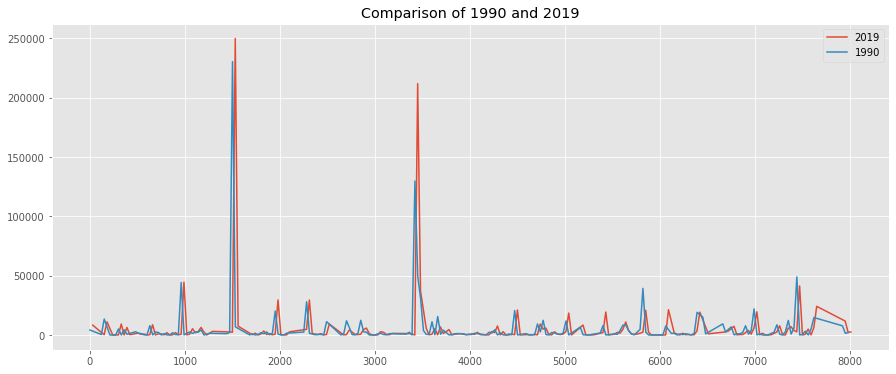

In [43]:
year_2019 = country[country['Year'] == 2019]
year_1990 = country[country['Year'] == 1990]
plt.style.use("ggplot")
plt.figure(figsize=(15, 6))
plt.plot(year_2019['Deaths'], label = '2019')
plt.plot(year_1990['Deaths'], label = '1990')

plt.title('Comparison of 1990 and 2019')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
whole_world = df[df['Entity'] == 'World']
fig = px.pie(whole_world, values='Deaths',hole = 0.3, names='Year',
             title='Proportion of Death by year accured by road accident',
             )
fig.show()

In [45]:
top15_country_by_year = pd.DataFrame()
for i in list(country['Year'].unique()):
    country_by_year = country[country['Year'] == i].sort_values(by='Deaths',ascending = False).head(10)
    top15_country_by_year = top15_country_by_year.append(country_by_year, ignore_index=False)
top15_country_by_year.head()

,Unnamed: 0,Entity,Code,Year,Deaths,Sidedness
1500,1500,China,CHN,1990,230499,1
3420,3420,India,IND,1990,129821,1
3450,3450,Indonesia,IDN,1990,49320,1
7440,7440,United States,USA,1990,48970,0
960,960,Brazil,BRA,1990,44236,0


In [46]:
len(top15_country_by_year['Entity'].unique())

14

In [47]:
fig = px.bar(top15_country_by_year, y= 'Deaths', 
            x = 'Year',color ='Entity', orientation = 'v',title = 'Top 10 countries with Highest occurances of Road Accidents',
            hover_name = 'Year',height = 600,text="Entity")
fig.layout.update(showlegend=False)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear'
    )
)
fig.show()